Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Load Data

In [20]:
# Path relatif ke file CSV
file_path = "../diabetes_raw/diabetes.csv"

# Load dataset
df = pd.read_csv(file_path)


EDA

In [21]:
# Tampilkan 5 baris pertama
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [14]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [15]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [16]:
df.describe(include="O")

,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


In [17]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(3854)

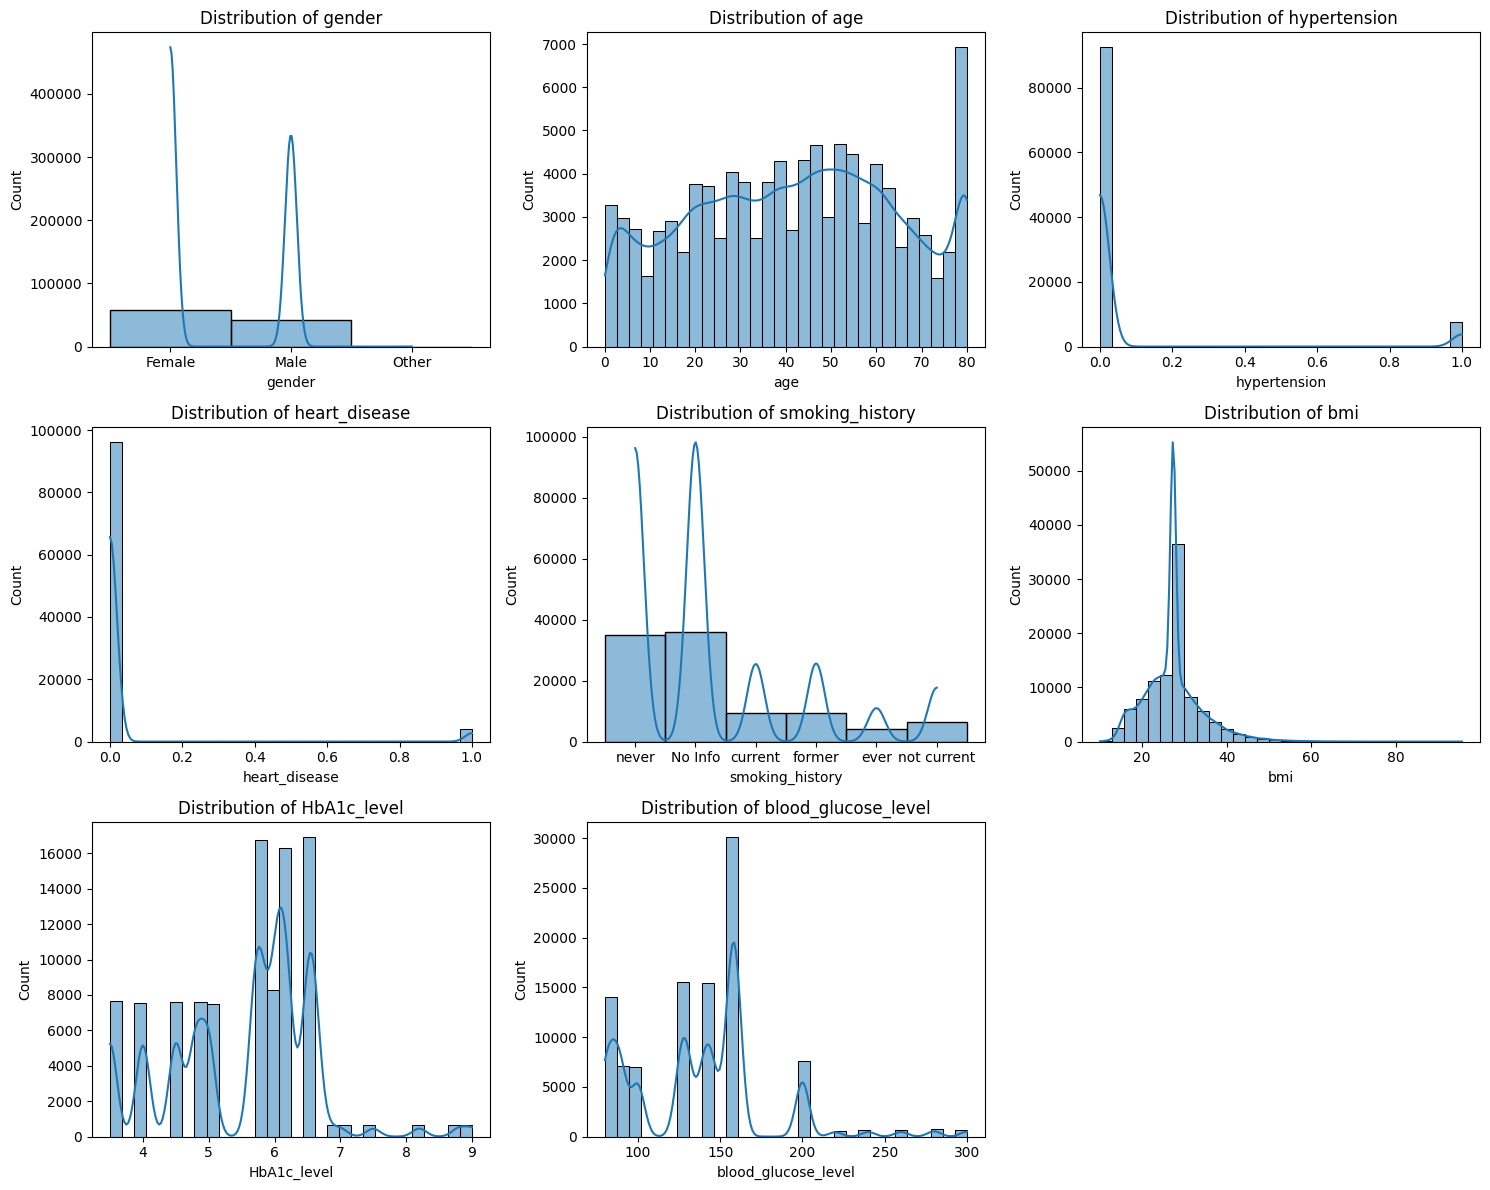

In [23]:
# Buat list fitur tanpa 'diabetes'
features = df.columns.drop('diabetes')

# Tentukan ukuran grid plot
num_features = len(features)
num_cols = 3
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

plt.figure(figsize=(15, num_rows * 4))

for i, feature in enumerate(features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


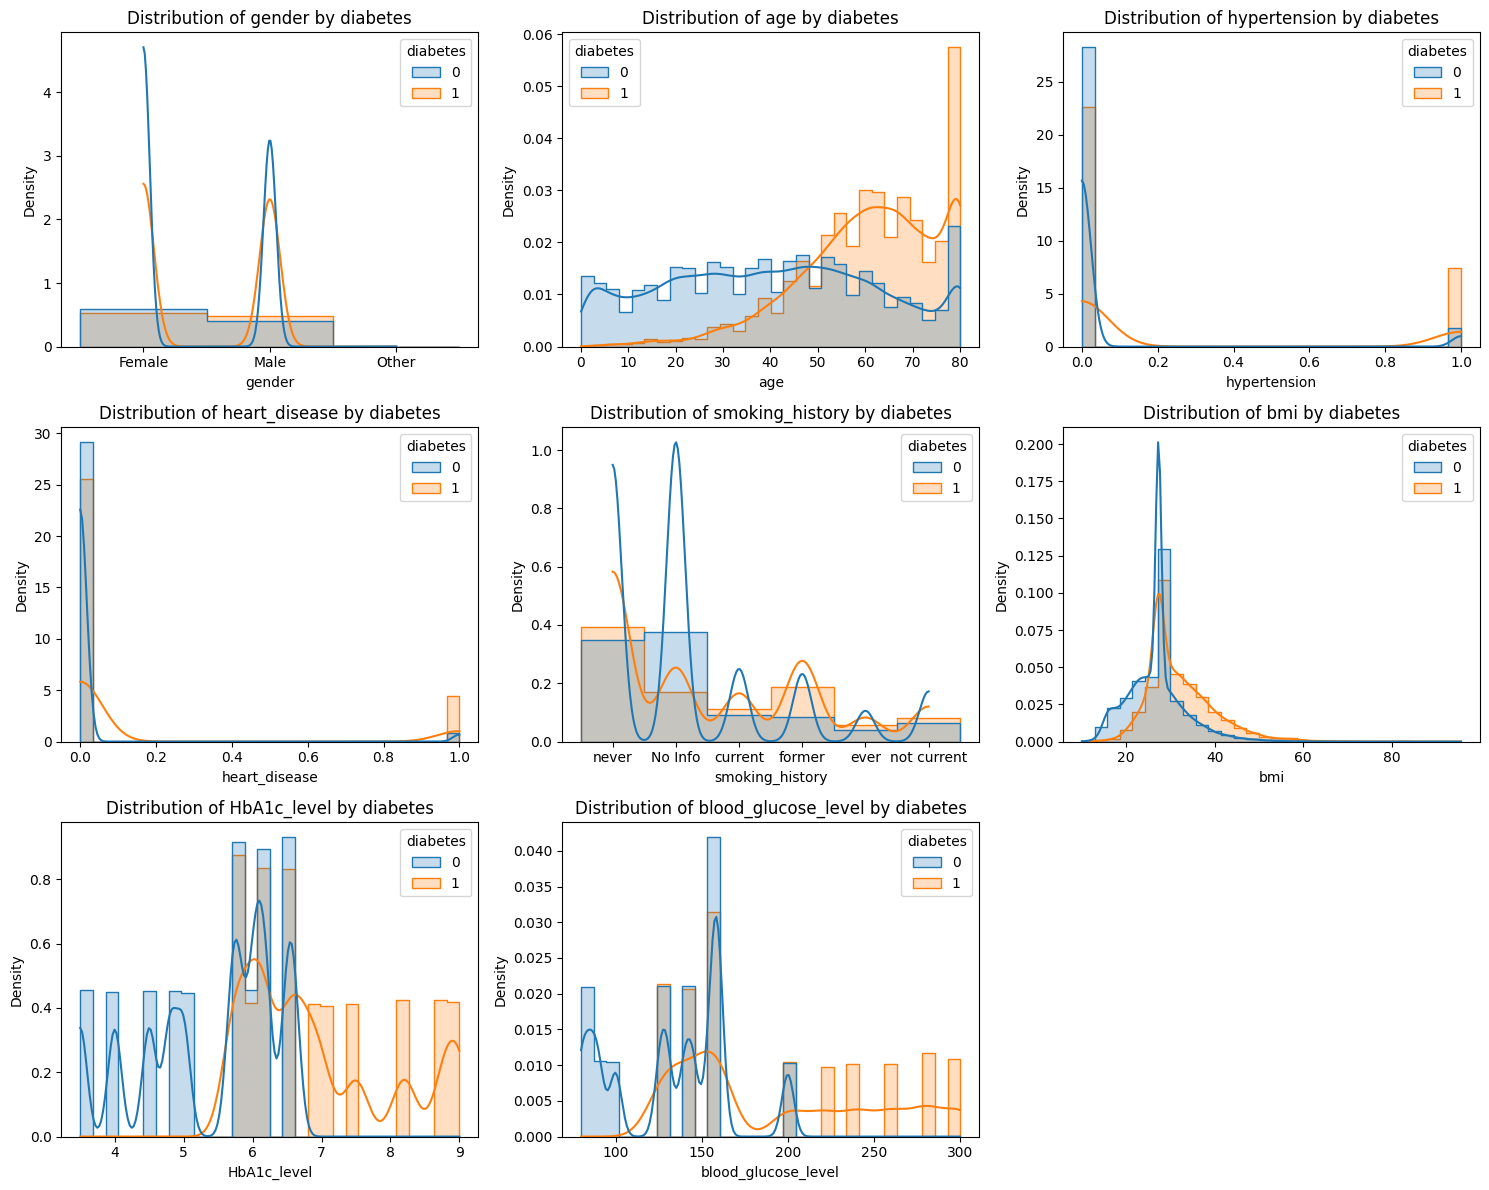

In [24]:
# Buat list fitur tanpa 'diabetes'
features = df.columns.drop('diabetes')

# Tentukan ukuran grid plot
num_features = len(features)
num_cols = 3
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

plt.figure(figsize=(15, num_rows * 4))

for i, feature in enumerate(features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data=df, x=feature, hue='diabetes', kde=True, bins=30, element='step', stat='density', common_norm=False)
    plt.title(f'Distribution of {feature} by diabetes')

plt.tight_layout()
plt.show()


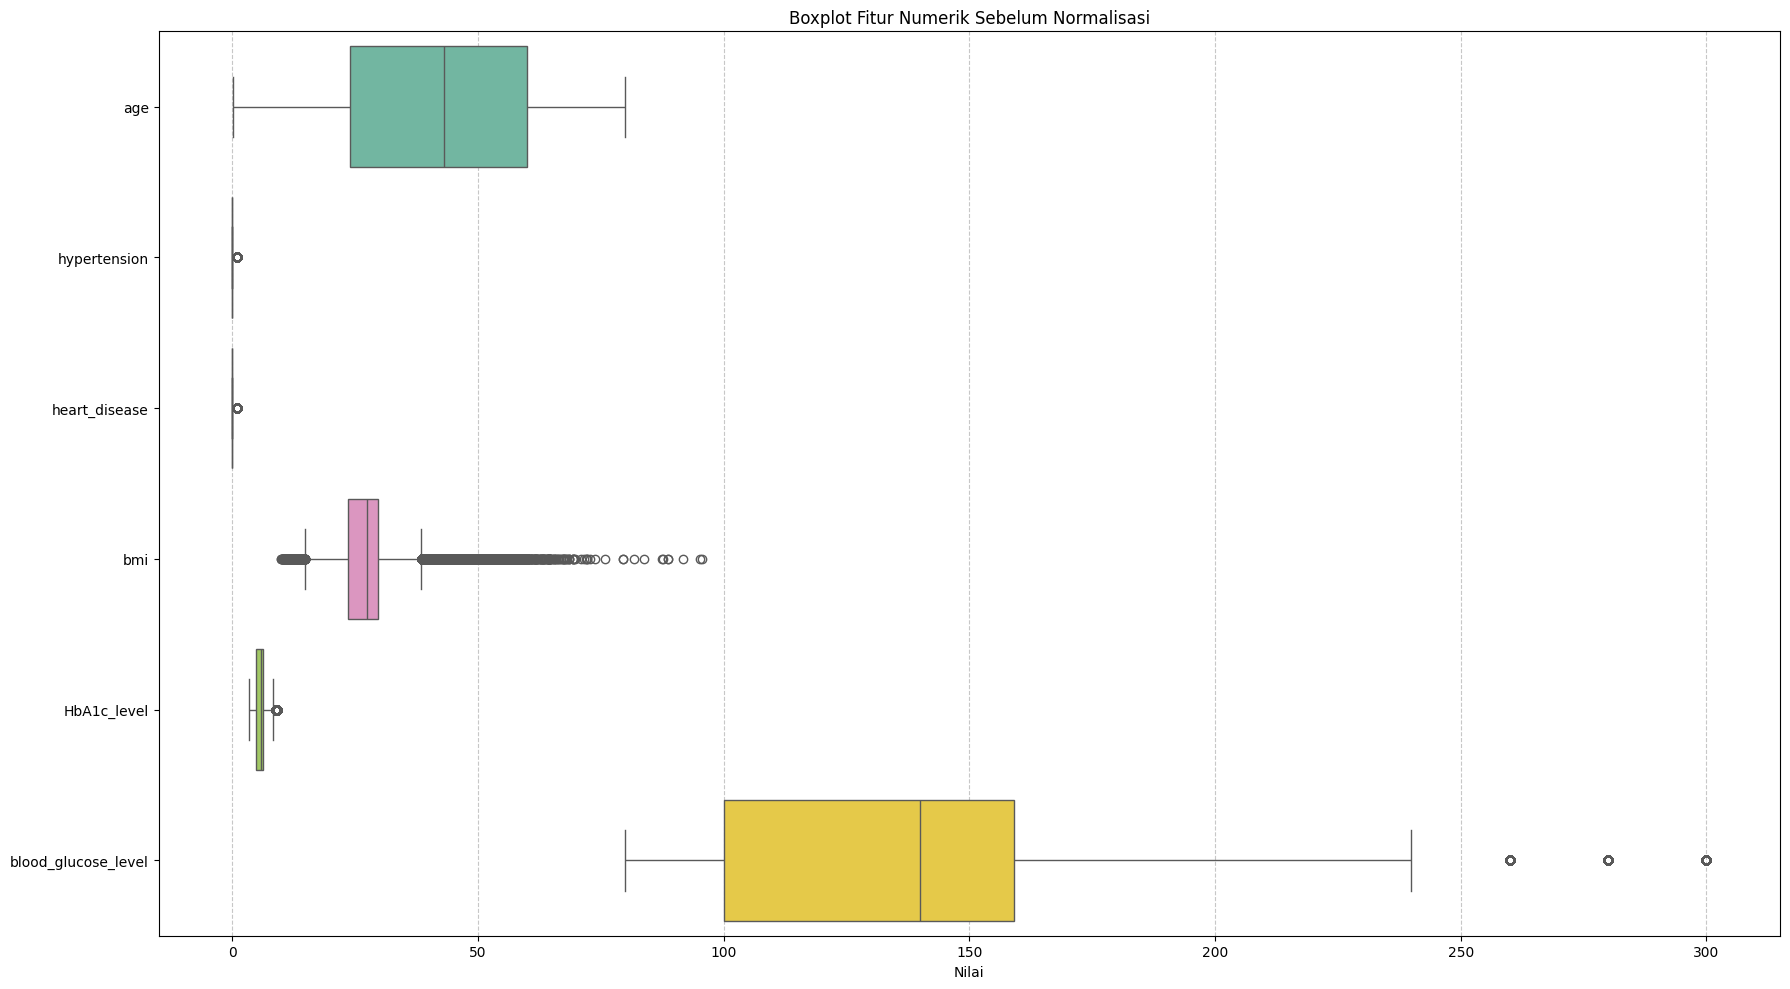

In [26]:
# Ambil semua fitur numerik (tanpa kolom 'diabetes' yang jadi target)
data_features = df.drop(columns='diabetes')

# Buat boxplot horizontal untuk melihat distribusi fitur
plt.figure(figsize=(18, 10))
sns.boxplot(data=data_features, orient='h', palette='Set2')
plt.title("Boxplot Fitur Numerik Sebelum Normalisasi")
plt.xlabel("Nilai")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Data Preprocessing

In [27]:
df.drop_duplicates(inplace=True)


In [28]:
q1 = df['bmi'].quantile(0.25)
q3 = df['bmi'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df['bmi']=df['bmi'].clip(lower_bound,upper_bound)

In [29]:
le = LabelEncoder()
df['gender']= le.fit_transform(df['gender'])

In [30]:
df["gender"]

0        0
1        0
2        1
3        0
4        1
        ..
99994    0
99996    0
99997    1
99998    0
99999    0
Name: gender, Length: 96146, dtype: int64

In [31]:
le = LabelEncoder()
df['smoking_history']= le.fit_transform(df['smoking_history'])

In [32]:
df["smoking_history"]

0        4
1        0
2        4
3        1
4        1
        ..
99994    0
99996    0
99997    3
99998    4
99999    1
Name: smoking_history, Length: 96146, dtype: int64

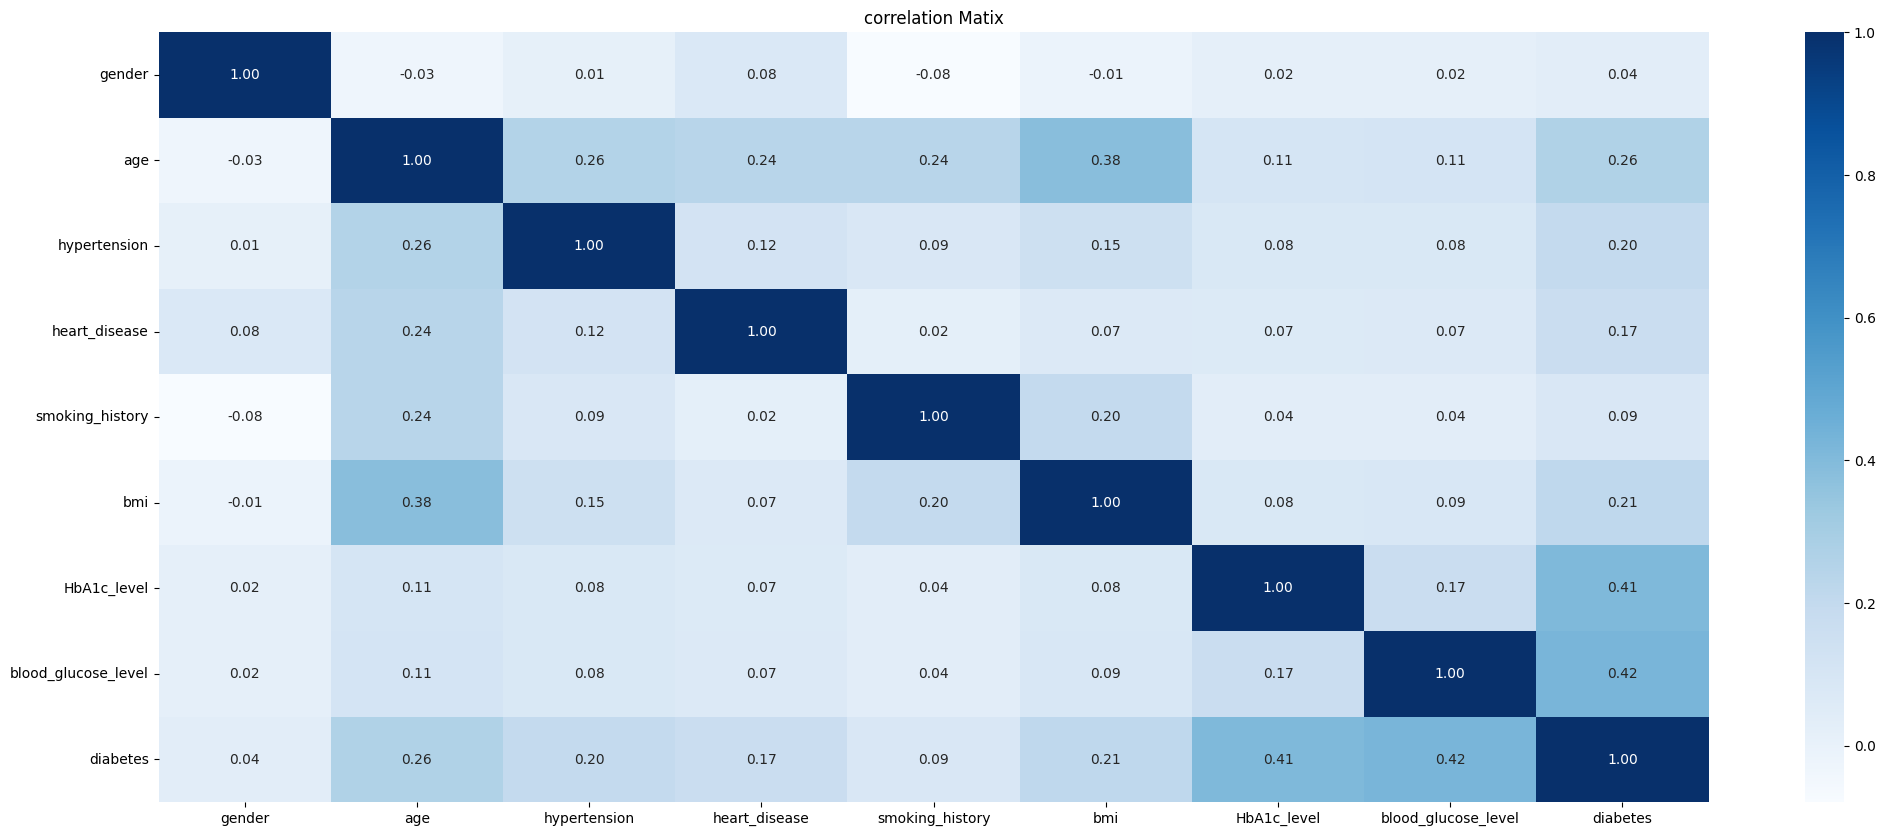

In [33]:
plt.figure(figsize=(25, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True,cmap='Blues', fmt=".2f")
plt.title("correlation Matix")
plt.show()

In [34]:
numerical_cols = ['age','bmi', 'HbA1c_level', 'blood_glucose_level']

In [35]:
x = df.drop('diabetes',axis=1)
y = df['diabetes']

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=42)